In [8]:
import torch
import numpy
import matplotlib.pyplot as plt

In [9]:
X = numpy.random.rand(30, 1).astype(numpy.float64)
Y = numpy.random.rand(30, 1).astype(numpy.float64)

In [34]:
input_layer = 1
hidden_layer = 1
output_layer = 1
learning_rate = 1e-3

def train(epochs: int, print_debug_info: bool = False) -> None:
    x_tensor = torch.from_numpy(X)
    y_tensor = torch.from_numpy(Y)

    weights = torch.rand(input_layer, hidden_layer, requires_grad=True, dtype=torch.float64)
    biases = torch.rand(input_layer, hidden_layer, requires_grad=True, dtype=torch.float64)

    def predict() -> torch.Tensor:
        multiplication_result = torch.mul(weights, x_tensor)
        return torch.add(multiplication_result, biases)

    for i in range(epochs):
        predicted = predict()
        loss = torch.sum(torch.pow(torch.sub(y_tensor, predicted), 2))

        if print_debug_info:
            iteration_id = i + 1
            if iteration_id % 100 == 0:
                print(f"{iteration_id}: {loss.item()}")

        loss.backward()

        with torch.no_grad():
            weights -= learning_rate * weights.grad
            biases -= learning_rate * biases.grad

            weights.grad = None
            biases.grad = None

    final_prediction = predict().detach().numpy()

    plt.title(f"Training a 2D regression model with {hidden_layer} neurons within the hidden layer after {epochs} epochs")
    plt.scatter(X, Y)
    plt.plot(X, final_prediction)
    plt.show()

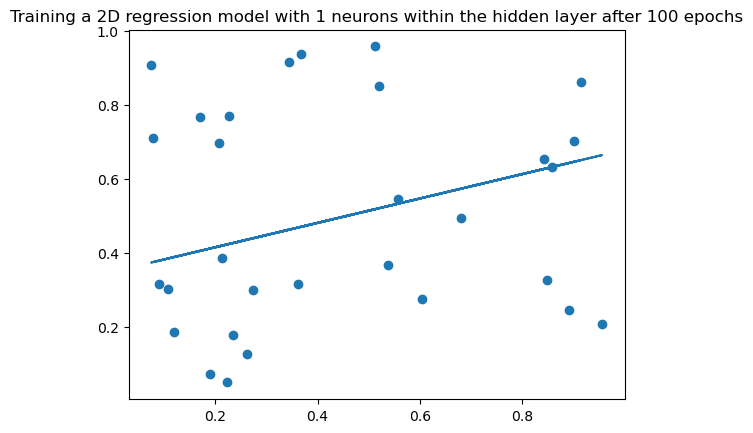

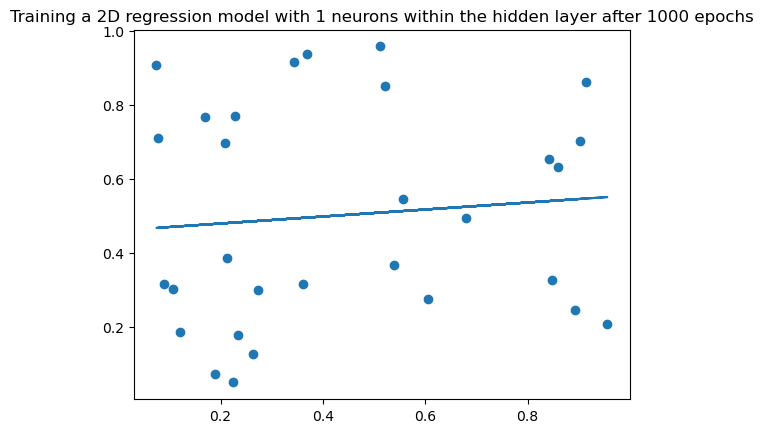

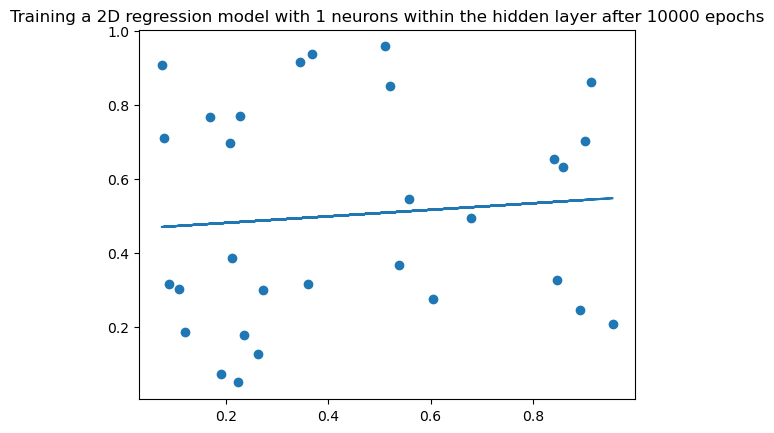

In [35]:
train(100)
train(1000)
train(10000)